<a href="https://colab.research.google.com/github/Sumaira-willis/Activity-2/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("creditcard.csv")

# Explore
print(df.info())
print(df.describe())

# Handle missing values
df = df.dropna()

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Train-test split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Random Forest baseline
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Logistic Regression baseline
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Random Forest Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       1.00      0.91      0.95        11

    accuracy                           1.00      2791
   macro avg       1.00      0.95      0.98      2791
weighted avg       1.00      1.00      1.00      2791

Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2780
         1.0       0.29      0.91      0.43        11

    accuracy                           0.99      2791
   macro avg       0.64      0.95      0.72      2791
weighted avg       1.00      0.99      0.99      2791

RF ROC-AUC: 0.9534663178548071
LR ROC-AUC: 0.9943100065402223


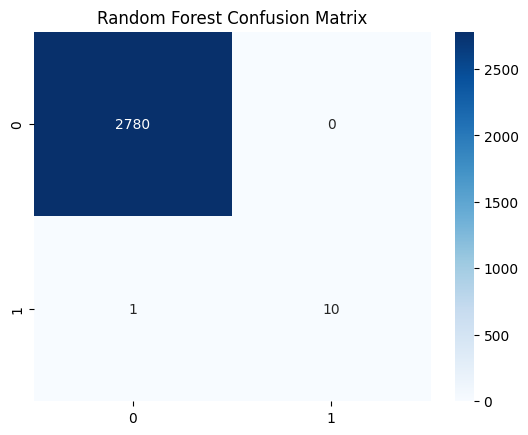

In [ ]:
# Model Evaluation & Optimization
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# ROC-AUC
print("RF ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("LR ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
# Model Deployment and Presentation
def predict_transaction(input_data):
    # input_data should be a numpy array shaped like X_test[0]
    prediction = rf.predict([input_data])
    return "Fraudulent" if prediction[0] == 1 else "Legitimate"

# Example usage
sample = X_test.iloc[0].values
print("Prediction:", predict_transaction(sample))


Prediction: Legitimate


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

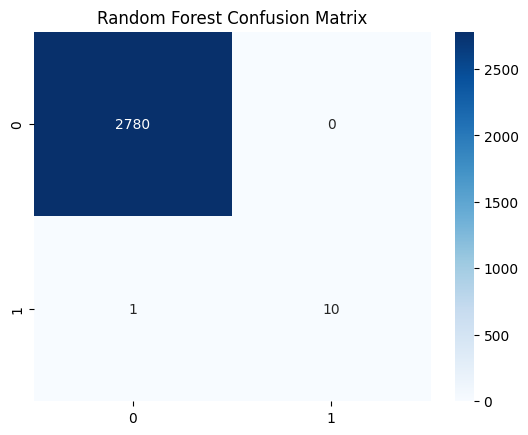

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
